<p align="center"><h1 align="center">QMSS5074GR <br> Projects in Advanced Machine Learning <br>Spring 2024 <br> FINAL PROJECT<br>Assignment 3 Part 1 Group 5</h1>

---
<br>

#### **Your UNI** : jc5635
#### **Your Full Name** : John Cheng
#### **Your AI Model Share Username**: jc5635
#### **Link to Your Public Github Repository** : https://github.com/johnc2024/HW_3_final_project
#### **Team Member Contribution Percentage** : 100%

## Stanford Sentiment Treebank - Movie Review Classification Competition




## 1. Import data

In [ ]:
# install aimodelshare library
! pip install aimodelshare

In [ ]:
# retrieve competition data
from aimodelshare import download_data
download_data('public.ecr.aws/y2e2a1d6/sst2_competition_data-repository:latest')


Data downloaded successfully.


In [ ]:
# import X_train, X_test, and y_train_labels
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

In [ ]:
X_train = pd.read_csv('sst2_competition_data/X_train.csv')
X_test = pd.read_csv('sst2_competition_data/X_test.csv')
y_train_labels = pd.read_csv('sst2_competition_data/y_train_labels.csv')

In [ ]:
X_train.head()

,text
0,The Rock is destined to be the 21st Century 's...
1,The gorgeously elaborate continuation of `` Th...
2,Singer/composer Bryan Adams contributes a slew...
3,Yet the act is still charming here .
4,Whether or not you 're enlightened by any of D...


In [ ]:
# convert to series
def to_series(df):
  if len(df.columns) == 1:
    df2 = df.iloc[:, 0]
    return df2
  else:
    None

In [ ]:
X_train_series = to_series(X_train)
X_test_series = to_series(X_test)
y_train_labels_series = to_series(y_train_labels)

In [ ]:
X_train_series

0       The Rock is destined to be the 21st Century 's...
1       The gorgeously elaborate continuation of `` Th...
2       Singer/composer Bryan Adams contributes a slew...
3                    Yet the act is still charming here .
4       Whether or not you 're enlightened by any of D...
                              ...                        
6915                                      A real snooze .
6916                                       No surprises .
6917    We 've seen the hippie-turned-yuppie plot befo...
6918    Her fans walked out muttering words like `` ho...
6919                                  In this case zero .
Name: text, Length: 6920, dtype: object

In [ ]:
# convert to list
X_train_list = X_train['text'].tolist()
X_test_list = X_test['text'].tolist()

In [ ]:
X_train_list[1:5]

["The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .",
 'Singer/composer Bryan Adams contributes a slew of songs -- a few potential hits , a few more simply intrusive to the story -- but the whole package certainly captures the intended , er , spirit of the piece .',
 'Yet the act is still charming here .',
 "Whether or not you 're enlightened by any of Derrida 's lectures on `` the other '' and `` the self , '' Derrida is an undeniably fascinating and playful fellow ."]

##2a.   Preprocess data




In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [ ]:
# set up preprocessing pipeline
tokenizer = Tokenizer(num_words = 2000)

tokenizer.fit_on_texts(X_train_list)
index_dict = tokenizer.word_index

len(index_dict)

13835

In [ ]:
index_list = list(index_dict.keys())

In [ ]:
pl = Pipeline([('count', CountVectorizer(vocabulary = index_list)),
               ('tfid', TfidfTransformer())]).fit(X_train_list)

In [ ]:
# preprocess X_train and X_test data
X_train_preproc = pl['count'].transform(X_train_list).toarray()
X_test_preproc = pl['count'].transform(X_test_list).toarray()

print(X_train_preproc, X_train_preproc.shape)
print(X_test_preproc, X_test_preproc.shape)

[[2 0 1 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [2 0 0 ... 1 0 0]
 [2 0 1 ... 0 1 1]
 [0 0 0 ... 0 0 0]] (6920, 13835)
[[1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (1821, 13835)


##2b.  EDA / Visualizations




In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import re

In [ ]:
# show X_train data as one string
X_train_prep = X_train_series.str.cat(sep = ' ')

In [ ]:
X_train_prep[:1000]

"The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal . The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth . Singer/composer Bryan Adams contributes a slew of songs -- a few potential hits , a few more simply intrusive to the story -- but the whole package certainly captures the intended , er , spirit of the piece . Yet the act is still charming here . Whether or not you 're enlightened by any of Derrida 's lectures on `` the other '' and `` the self , '' Derrida is an undeniably fascinating and playful fellow . Just the labour involved in creating the layered richness of the imagery in this chiaroscuro of madness and light is astonishing . Part of the charm of Satin Rouge is that it avoids

In [ ]:
# strip out non-word fragments
X_train_prep_new = re.sub('\'s|\'re|n\'t', '', X_train_prep)

In [ ]:
# add trivial words to existing STOPWORDS list
stopwords_new = STOPWORDS.update(['movie', 'film', 'one', 'will', 'make', 'much'])

In [ ]:
# generate word cloud
wordcloud_rev = WordCloud(width = 5000, height = 5000, background_color = 'white',
                          collocations = False, stopwords = stopwords_new, random_state = 5).generate(X_train_prep_new)

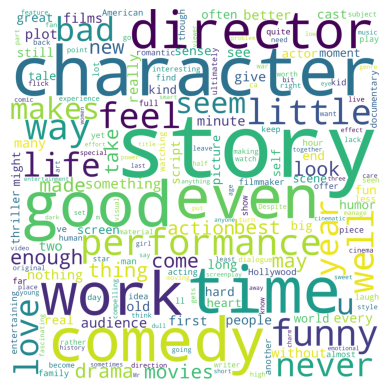

In [ ]:
plt.axis('off')
plt.imshow(wordcloud_rev)

In [ ]:
# show subsample of word counts
X_train_counts = X_train
X_train_counts['wordcount'] = X_train['text'].str.split().str.len()

In [ ]:
X_train_counts

,text,wordcount
0,The Rock is destined to be the 21st Century 's...,36
1,The gorgeously elaborate continuation of `` Th...,37
2,Singer/composer Bryan Adams contributes a slew...,39
3,Yet the act is still charming here .,8
4,Whether or not you 're enlightened by any of D...,32
...,...,...
6915,A real snooze .,4
6916,No surprises .,3
6917,We 've seen the hippie-turned-yuppie plot befo...,23
6918,Her fans walked out muttering words like `` ho...,32


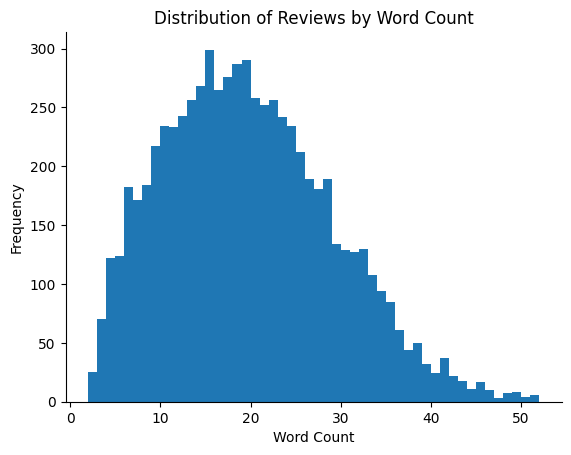

In [ ]:
# show histogram of word counts
X_train_counts['wordcount'].plot(kind = 'hist', bins = 50, title = 'Distribution of Reviews by Word Count', xlabel = 'Word Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

##3. Fit first model + prep for submission to Model Share AI

**(a) Random forest classifier -- initial model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# fit model
rf_a = RandomForestClassifier(max_depth = 50, n_estimators = 80, random_state = 5)
rf_a.fit(X_train_preproc, y_train_labels)

RandomForestClassifier(max_depth=50, n_estimators=80, random_state=5)

In [ ]:
# score model
rf_a_score = rf_a.score(X_train_preproc, y_train_labels)
rf_a_score

0.9216763005780347

In [ ]:
# generate prediction labels
rf_a_prediction_labels = rf_a.predict(X_test_preproc)

#### Save preprocessor function to local "preprocessor.zip" file

In [ ]:
# set previous preprocessing steps as function
def preprocessor(data):

  tokenizer = Tokenizer(num_words = 2000)
  tokenizer.fit_on_texts(data)

  index_dict = tokenizer.word_index
  index_list = list(index_dict.keys())

  pl = Pipeline([('count', CountVectorizer(vocabulary = index_list)),
                 ('tfid', TfidfTransformer())]).fit(data)

  return pl['count'].transform(data).toarray()

In [ ]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"")

#### Save model to local ".onnx" file

In [ ]:
from aimodelshare.aimsonnx import model_to_onnx
from skl2onnx.common.data_types import FloatTensorType

In [ ]:
feature_count = X_train_preproc.shape[1]
initial_type = [('float_input', FloatTensorType([None, feature_count]))]

In [ ]:
onnx_rf_a = model_to_onnx(rf_a, framework = 'sklearn',
                          initial_types = initial_type,
                          transfer_learning = False,
                          deep_learning = False)

with open('rf_a.onnx', 'wb') as f:
    f.write(onnx_rf_a.SerializeToString())

## 4. Submit first model and generated predictions to competition


In [ ]:
# set credentials
from aimodelshare.aws import set_credentials

apiurl = 'https://rlxjxnoql9.execute-api.us-east-1.amazonaws.com/prod/m'

set_credentials(apiurl = apiurl)

Modelshare.ai Username:··········
Modelshare.ai Password:··········
Modelshare.ai login credentials set successfully.


In [ ]:
# instantiate competition
import aimodelshare as ai
mycompetition = ai.Competition(apiurl)

In [ ]:
# submit to leaderboard
mycompetition.submit_model(model = 'rf_a.onnx',
                                 preprocessor = preprocessor,
                                 prediction_submission = rf_a_prediction_labels)

Your preprocessor is now saved to 'preprocessor.zip'
Insert search tags to help users find your model (optional): random_forest
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 537

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:2763


## 5. Fit additional models and submit to  leaderboard


**(b) Random forest classifier -- updated model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# fit model
rf_b = RandomForestClassifier(max_depth = 120, n_estimators = 200, random_state = 5)
rf_b.fit(X_train_preproc, y_train_labels)

RandomForestClassifier(max_depth=120, n_estimators=200, random_state=5)

In [ ]:
# score model
rf_b_score = rf_b.score(X_train_preproc, y_train_labels)
rf_b_score

0.9816473988439306

In [ ]:
# generate predicted labels
rf_b_prediction_labels = rf_b.predict(X_test_preproc)

In [ ]:
# submit to leaderboard
onnx_rf_b = model_to_onnx(rf_b, framework = 'sklearn',
                          initial_types = initial_type,
                          transfer_learning = False,
                          deep_learning = False)

with open('rf_b.onnx', 'wb') as f:
    f.write(onnx_rf_a.SerializeToString())

mycompetition.submit_model(model = 'rf_b.onnx',
                           preprocessor = preprocessor,
                           prediction_submission = rf_b_prediction_labels)

Your preprocessor is now saved to 'preprocessor.zip'
Insert search tags to help users find your model (optional): random_forest
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 538

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:2763


**(c) Random forest classifer with GridSearchCV**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
# fit model
param_grid = {'max_depth': np.arange(2, 20)}

rf_cv = RandomForestClassifier(n_estimators = 30, random_state = 5)
rf_cv_grid = GridSearchCV(rf_cv, param_grid)

rf_cv_grid.fit(X_train_preproc, y_train_labels)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=30, random_state=5),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [ ]:
# score model
rf_cv_grid.score(X_train_preproc, y_train_labels)

0.7777456647398844

In [ ]:
# generate predicted labels
rf_cv_prediction_labels = rf_cv_grid.predict(X_test_preproc)

In [ ]:
# return best score
rf_cv_grid_score = rf_cv_grid.best_score_
rf_cv_grid_score

0.666907514450867

In [ ]:
rf_cv_grid_params = rf_cv_grid.best_params_
rf_cv_grid_params

{'max_depth': 19}

In [ ]:
from aimodelshare.aimsonnx import model_to_onnx

In [ ]:
# submit to leaderboard
onnx_rf_cv = model_to_onnx(rf_cv_grid, framework = 'sklearn',
                          initial_types = initial_type,
                          transfer_learning = False,
                          deep_learning = False)

with open('rf_cv_grid.onnx', 'wb') as f:
    f.write(onnx_rf_cv.SerializeToString())

mycompetition.submit_model(model = 'rf_cv_grid.onnx',
                           preprocessor = preprocessor,
                           prediction_submission = rf_cv_prediction_labels)

Your preprocessor is now saved to 'preprocessor.zip'
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 540

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:2763


**(d) Gradient boosting classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# fit model
gbc = GradientBoostingClassifier(n_estimators = 50,
                                 learning_rate = 1,
                                 max_depth = 3,
                                 random_state = 5)

gbc.fit(X_train_preproc, y_train_labels)

GradientBoostingClassifier(learning_rate=1, n_estimators=50, random_state=5)

In [ ]:
# score model
gbc_score = gbc_fit.score(X_train_preproc, y_train_labels)
gbc_score

0.7658959537572254

In [ ]:
# generate predicted values
gbc_prediction_labels = gbc_fit.predict(X_test_preproc)

In [ ]:
# submit to leaderboard
onnx_gbc = model_to_onnx(gbc, framework = 'sklearn',
                          initial_types = initial_type,
                          transfer_learning = False,
                          deep_learning = False)

with open('gbc.onnx', 'wb') as f:
    f.write(onnx_gbc.SerializeToString())

mycompetition.submit_model(model = 'gbc.onnx',
                           preprocessor = preprocessor,
                           prediction_submission = gbc_prediction_labels)

Your preprocessor is now saved to 'preprocessor.zip'
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 541

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:2763


**(e) K-nearest neighbors classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# fit model
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_preproc, y_train_labels)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# score model
knn_score = knn.score(X_train_preproc, y_train_labels)
knn_score

0.7856936416184971

In [ ]:
# score model
knn.score(X_train_preproc, y_train_labels)

0.7856936416184971

In [ ]:
# generate predicted values
knn_prediction_labels = knn.predict(X_test_preproc)

In [ ]:
# submit to leaderboard
onnx_knn = model_to_onnx(knn, framework = 'sklearn',
                         initial_types = initial_type,
                         transfer_learning = False,
                         deep_learning = False)

with open('knn.onnx', 'wb') as f:
    f.write(onnx_knn.SerializeToString())

mycompetition.submit_model(model = 'knn.onnx',
                           preprocessor = preprocessor,
                           prediction_submission = knn_prediction_labels)

In [ ]:
# return leaderboard
data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

In [ ]:
# compare models on leaderboard
data = mycompetition.compare_models([1, 2, 3], verbose = 1)
mycompetition.stylize_compare(data)

,Model_1_Layer,Model_1_Shape,Model_1_Params,Model_2_Layer,Model_2_Shape,Model_2_Params,Model_3_Layer,Model_3_Shape,Model_3_Params
0,Embedding,"[None, 40, 16]",160000.000000,Embedding,"[None, 40, 16]",160000,Embedding,"[None, 40, 16]",160000.000000
1,Flatten,"[None, 640]",0.000000,LSTM,"[None, 40, 32]",6272,LSTM,"[None, 40, 256]",279552.000000
2,Dense,"[None, 2]",1282.000000,LSTM,"[None, 32]",8320,Flatten,"[None, 10240]",0.000000
3,None,None,nan,Flatten,"[None, 32]",0,Dense,"[None, 2]",20482.000000
4,None,None,nan,Dense,"[None, 2]",66,None,None,nan


## 6. Results / Discussion

In [ ]:
# results as dataframe
results = {'Model': ['Random Forest - Initial',
                 'Random Forest - Updated',
                 'Random Forest - GridSearchCV',
                 'Gradient Boosting',
                 'K-Nearest Neighbors'],
        'Score': [rf_a_score,
                  rf_b_score,
                  rf_cv_grid_score,
                  gbc_score,
                  knn_score]}

summary = pd.DataFrame(results, index = ['(a)', '(b)', '(c)', '(d)', '(e)'])
summary

,Model,Score
(a),Random Forest - Initial,0.921676
(b),Random Forest - Updated,0.981647
(c),Random Forest - GridSearchCV,0.666908
(d),Gradient Boosting,0.765896
(e),K-Nearest Neighbors,0.785694


In [ ]:
# results as tabulate object
from tabulate import tabulate

table = tabulate(summary)
print(table)

---  ----------------------------  --------
(a)  Random Forest - Initial       0.921676
(b)  Random Forest - Updated       0.981647
(c)  Random Forest - GridSearchCV  0.666908
(d)  Gradient Boosting             0.765896
(e)  K-Nearest Neighbors           0.785694
---  ----------------------------  --------


The updated random forest model has the highest score (0.98), resulting from a large tree depth and estimator count; there may be overfitting.